In [64]:
from manim import *
from scipy.optimize import fsolve

In [381]:
%%manim -qm -v WARNING GraphingIntro

class GraphingIntro(Scene):
    def construct(self):
        # Define axes
        axes = Axes(
            x_range = (0, 1.2),
            y_range = (0, 1.8),
            x_length = 7,
            axis_config={"include_numbers": False, "include_ticks": False},
        )
        # Define graphs
        
        c=ValueTracker(0)
        
        cost_function = lambda x: x**2 + c.get_value()
        revenue_function = lambda x: x
        
        
        def optimum_finder(func1, func2, goToX=False):
            x_val = fsolve(lambda x: func1(x) - func2(x), 1)[0]
            if goToX:
                y_val = -.05 -.3*c.get_value()
            else:
                y_val = cost_function(x_val)
            return axes.c2p(x_val, y_val)

        def toRedraw():    
            lilLine = lambda x: x-.26+c.get_value()
            littleRev = axes.plot(lilLine, x_range=(.4, .6, 0.05), color=YELLOW)
            cost  = axes.plot(cost_function, x_range=(0, 1.1, 0.05))
            cost_label = axes.get_graph_label(cost, label=r"\text{Total Private}\\ \text{Cost}", x_val=1.1, direction=UP, buff=0).scale(.4)
            revenue = axes.plot(revenue_function, x_range=(0, 1.1, 0.05))
            revenue_label = axes.get_graph_label(revenue, label=r"\text{Total Private}\\ \text{Revenue}", x_val=1.1, direction=RIGHT, buff=-.5).scale(.4)


            optimal_lil = axes.get_vertical_line(axes.c2p(0.5, 0.25+c.get_value()), color=YELLOW)
            optimum_lil_label = Tex(r"$I^*_{P}$", font_size=22, color=YELLOW).move_to(axes.c2p(0.5, -.05))
        
            return VGroup(cost, revenue, cost_label, revenue_label, littleRev, optimal_lil, optimum_lil_label)
        
        funcs = always_redraw(toRedraw)
        
        def reoptimize():
            optimal_point = optimum_finder(cost_function, revenue_function)
            optimal = axes.get_vertical_line(optimal_point, color=BLUE)
            dot = Dot(point=optimal_point, color=BLUE)
            optimal_point_label = optimum_finder(cost_function, revenue_function, True)
            optimum_label = Tex(r"$I_{OA}$", font_size=22, color=BLUE).move_to(optimal_point_label)
            return VGroup(optimal, dot, optimum_label)
        
        plot_opt = always_redraw(reoptimize)

        axes_labels = axes.get_axis_labels(Tex(r"Resources Required\\ to Deforest").scale(0.6), Tex("Total Monetary Value").scale(0.6))
        
        
        k = ValueTracker(0)
        
        profit_label = Tex(r"profit", font_size=16, color=ORANGE).move_to(axes.c2p(.55, .41))
        tax_label = Tex(r"tax", font_size=16, color=ORANGE).move_to(axes.c2p(-.04, .14))
        
        def taxes():
            dot = Dot(point=axes.c2p(.5-k.get_value(), cost_function(.5)-.5*k.get_value()), color=ORANGE)
            dot2 = Dot(point=axes.c2p(.5-k.get_value(), revenue_function(.5)-.5*k.get_value()), color=ORANGE)
            line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
            return VGroup(line)
        
        tax_group = always_redraw(taxes)
           
        self.add(
            axes,
            axes_labels,
            funcs,
            plot_opt
        )
        
        self.wait(1)
        self.play(FadeIn(tax_group, profit_label))
        self.wait(1.5)
        self.play(k.animate.set_value(.5),
                 FadeTransform(profit_label, tax_label)
                 )
        self.wait(1)
        self.play(c.animate(run_time=2).set_value(0.25))
        self.wait(1.5)

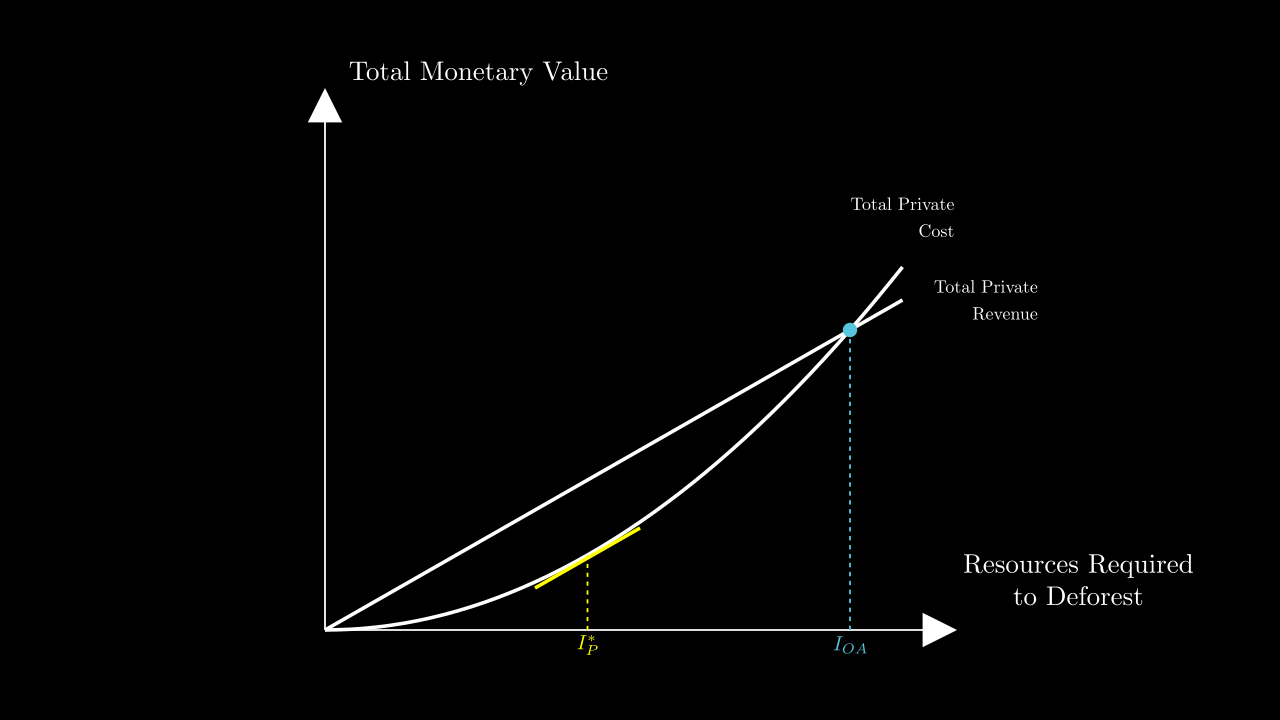

In [382]:
%%manim -qm -v WARNING GraphingIntro

class GraphingIntro(Scene):
    def construct(self):
        # Define axes
        axes = Axes(
            x_range = (0, 1.2),
            y_range = (0, 1.8),
            x_length = 7,
            axis_config={"include_numbers": False, "include_ticks": False},
        )
        # Define graphs
        
        c=ValueTracker(0)
        
        cost_function = lambda x: x**2 + c.get_value()
        revenue_function = lambda x: x
        
        
        def optimum_finder(func1, func2, goToX=False):
            x_val = fsolve(lambda x: func1(x) - func2(x), 1)[0]
            if goToX:
                y_val = -.05 -.3*c.get_value()
            else:
                y_val = cost_function(x_val)
            return axes.c2p(x_val, y_val)

        def toRedraw():    
            lilLine = lambda x: x-.26+c.get_value()
            littleRev = axes.plot(lilLine, x_range=(.4, .6, 0.05), color=YELLOW)
            cost  = axes.plot(cost_function, x_range=(0, 1.1, 0.05))
            cost_label = axes.get_graph_label(cost, label=r"\text{Total Private}\\ \text{Cost}", x_val=1.1, direction=UP, buff=0).scale(.4)
            revenue = axes.plot(revenue_function, x_range=(0, 1.1, 0.05))
            revenue_label = axes.get_graph_label(revenue, label=r"\text{Total Private}\\ \text{Revenue}", x_val=1.1, direction=RIGHT, buff=-.5).scale(.4)


            optimal_lil = axes.get_vertical_line(axes.c2p(0.5, 0.25+c.get_value()), color=YELLOW)
            optimum_lil_label = Tex(r"$I^*_{P}$", font_size=22, color=YELLOW).move_to(axes.c2p(0.5, -.05))
        
            return VGroup(cost, revenue, cost_label, revenue_label, littleRev, optimal_lil, optimum_lil_label)
        
        funcs = always_redraw(toRedraw)
        
        def reoptimize():
            optimal_point = optimum_finder(cost_function, revenue_function)
            optimal = axes.get_vertical_line(optimal_point, color=BLUE)
            dot = Dot(point=optimal_point, color=BLUE)
            optimal_point_label = optimum_finder(cost_function, revenue_function, True)
            optimum_label = Tex(r"$I_{OA}$", font_size=22, color=BLUE).move_to(optimal_point_label)
            return VGroup(optimal, dot, optimum_label)
        
        plot_opt = always_redraw(reoptimize)

        axes_labels = axes.get_axis_labels(Tex(r"Resources Required\\ to Deforest").scale(0.6), Tex("Total Monetary Value").scale(0.6))
        
        
        k = ValueTracker(0)
        
        profit_label = Tex(r"profit", font_size=16, color=ORANGE).move_to(axes.c2p(.55, .41))
        tax_label = Tex(r"tax", font_size=16, color=ORANGE).move_to(axes.c2p(-.04, .14))
        
        def taxes():
            dot = Dot(point=axes.c2p(.5-k.get_value(), cost_function(.5)-.5*k.get_value()), color=ORANGE)
            dot2 = Dot(point=axes.c2p(.5-k.get_value(), revenue_function(.5)-.5*k.get_value()), color=ORANGE)
            line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
            return VGroup(line)
        
        tax_group = always_redraw(taxes)
           
        self.add(
            axes,
            axes_labels,
            funcs,
            plot_opt
        )
        
#         self.wait(1)
#         self.play(FadeIn(tax_group, profit_label))
#         self.wait(1.5)
#         self.play(k.animate.set_value(.5),
#                  FadeTransform(profit_label, tax_label)
#                  )
#         self.wait(1)
#         self.play(c.animate(run_time=2).set_value(0.25))
#         self.wait(1.5)